In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import joblib



In [ ]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('../content/cpds.csv')

In [ ]:
# Extract year, month, and week of the month from the 'Date' column
df['Date'] = df['Date'].astype(str)
df = df.convert_dtypes()

In [ ]:
#splitting the date column
df['Year'] = df['Date'].apply(lambda x: int(x.split('.')[0]))
df['Month'] = df['Date'].apply(lambda x: int(x.split('.')[1]))
df['Week'] = df['Date'].apply(lambda x: int(x.split('W')[1]))
df = df.drop('Date', axis=1)

df.head()

,Prices,Year,Month,Week
0,94.38,2017,1,1
1,92.94,2017,1,2
2,89.14,2017,1,4
3,90.0,2017,1,4
4,86.15,2017,2,1


In [ ]:
# Define the input and output variables
X = df[['Year', 'Month', 'Week']].values
y = df[['Prices']].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Year', 'Month', 'Week']], df['Prices'], test_size=0.2, random_state=42)

In [ ]:
# Define a list of machine learning models to use
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

In [ ]:
# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(type(model).__name__, "Mean Squared Error:", mse , "R-squared score:", r2)


LinearRegression Mean Squared Error: 1699.8896846251928 R-squared score: 0.3668818237322795
DecisionTreeRegressor Mean Squared Error: 358.70692800000006 R-squared score: 0.8664008152270007
RandomForestRegressor Mean Squared Error: 427.02712205487353 R-squared score: 0.8409551895175797


In [ ]:
# Choose the model with the lowest MSE
best_model = models[np.argmin([mean_squared_error(y_test, model.predict(X_test)) for model in models])]

In [ ]:
# Save the best model as a joblib file
joblib.dump(best_model, '/content/best_model.joblib')

['/content/best_model.joblib']

In [ ]:
# Load the saved model from the joblib file
loaded_model = joblib.load('/content/best_model.joblib')

In [ ]:
# Ask the user to input values for year, month , and week
a = float(input("Enter a value for year: "))
b = int(input("Enter a value for month : "))
c = int(input("Enter a value for week: "))


Enter a value for A: 2019
Enter a value for B: 01
Enter a value for C: 1


In [ ]:

# Predict the value of D using the chosen model
X_new = pd.DataFrame({'Year': [a], 'Month': [b], 'Week': [c]})
y_new = best_model.predict(X_new)
print("Predicted value of D:", y_new[0])

Predicted value of D: 175.14


<Axes: >

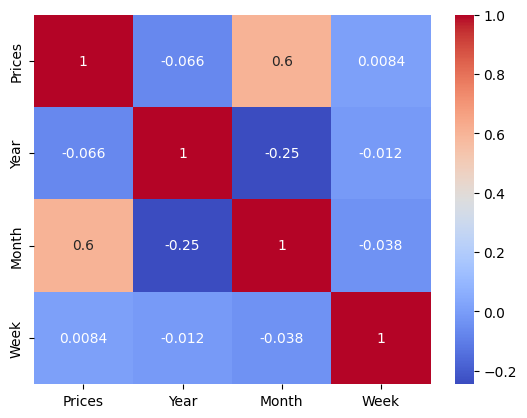

In [ ]:
import seaborn as sns
# Create a correlation matrix
corr = df.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

